## Table of Contents

1) Import libraries and data

2) Data wrangling

3) Create correlation matrix heatmap

4) Create scatterplots 

5) Create pair plot

6) Create categorical plot

7) Bar charts

8) Revisiting data questions

9) Developing hypothesis

10) Export Data

### 1
Import libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#define path
path = r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Traffic Project\Data'

In [3]:
#import cleaned traffic data frame
traffic = pd.read_csv(os.path.join(path, 'Prepared', 'v1_traffic_cleaned.csv'), index_col= False)

In [4]:
#check shape of traffic
traffic.shape

(2599384, 48)

In [5]:
#see head of traffic
pd.set_option("display.max_columns", None)
traffic.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_date,start_time
0,0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-05-21,08:29:55
1,1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-10-07,17:43:09
2,2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-12-13,21:53:00
3,3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2018-04-17,16:51:23
4,4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-08-31,17:40:49


In [6]:
#drop Unnamed: 0 column
traffic = traffic.drop(columns='Unnamed: 0')

In [7]:
traffic.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'start_date', 'start_time'],
      dtype='object')

### 2
Data Wrangling

In [8]:
#split start_time values into new column time_of_day with values of (21-3) night, (3-9) morning, (9-15) day, (15-21) evening
traffic.loc[(traffic['start_time'] > '21:00:00') | (traffic['start_time'] <= '03:00:00'), 'time_of_day'] = 'Night'

In [9]:
traffic.loc[(traffic['start_time'] > '03:00:00') & (traffic['start_time'] <= '09:00:00'), 'time_of_day'] = 'Morning'

In [10]:
traffic.loc[(traffic['start_time'] > '09:00:00') & (traffic['start_time'] <= '15:00:00'), 'time_of_day'] = 'Day'

In [11]:
traffic.loc[(traffic['start_time'] > '15:00:00') & (traffic['start_time'] <= '21:00:00'), 'time_of_day'] = 'Evening'

In [12]:
#check counts for time_of_day
traffic['time_of_day'].value_counts()

Evening    885538
Day        760959
Morning    638603
Night      314284
Name: time_of_day, dtype: int64

In [13]:
#remove unneeded columns after time_of_day creation
traffic = traffic.drop(columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight',])

In [14]:
#create new column of count of accidents by day to use as dependant variable for time series
traffic['acdnt_per_day'] = traffic.groupby(['start_date'])['start_date'].transform('count')

In [15]:
traffic.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1693
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2450
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5467
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1626
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1250


### 3
Create correlation matrix heatmap

In [16]:
#create dataframe traffic_corre that includes numerical columns to correlate
traffic_corre = traffic.filter(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'acdnt_per_day'], axis = 1)

In [17]:
#check head of traffic_explore
traffic_corre.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),acdnt_per_day
0,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,7.0,0.0,1693
1,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,3.0,0.0,2450
2,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,6.0,0.0,5467
3,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,4.6,0.0,1626
4,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,13.8,0.0,1250


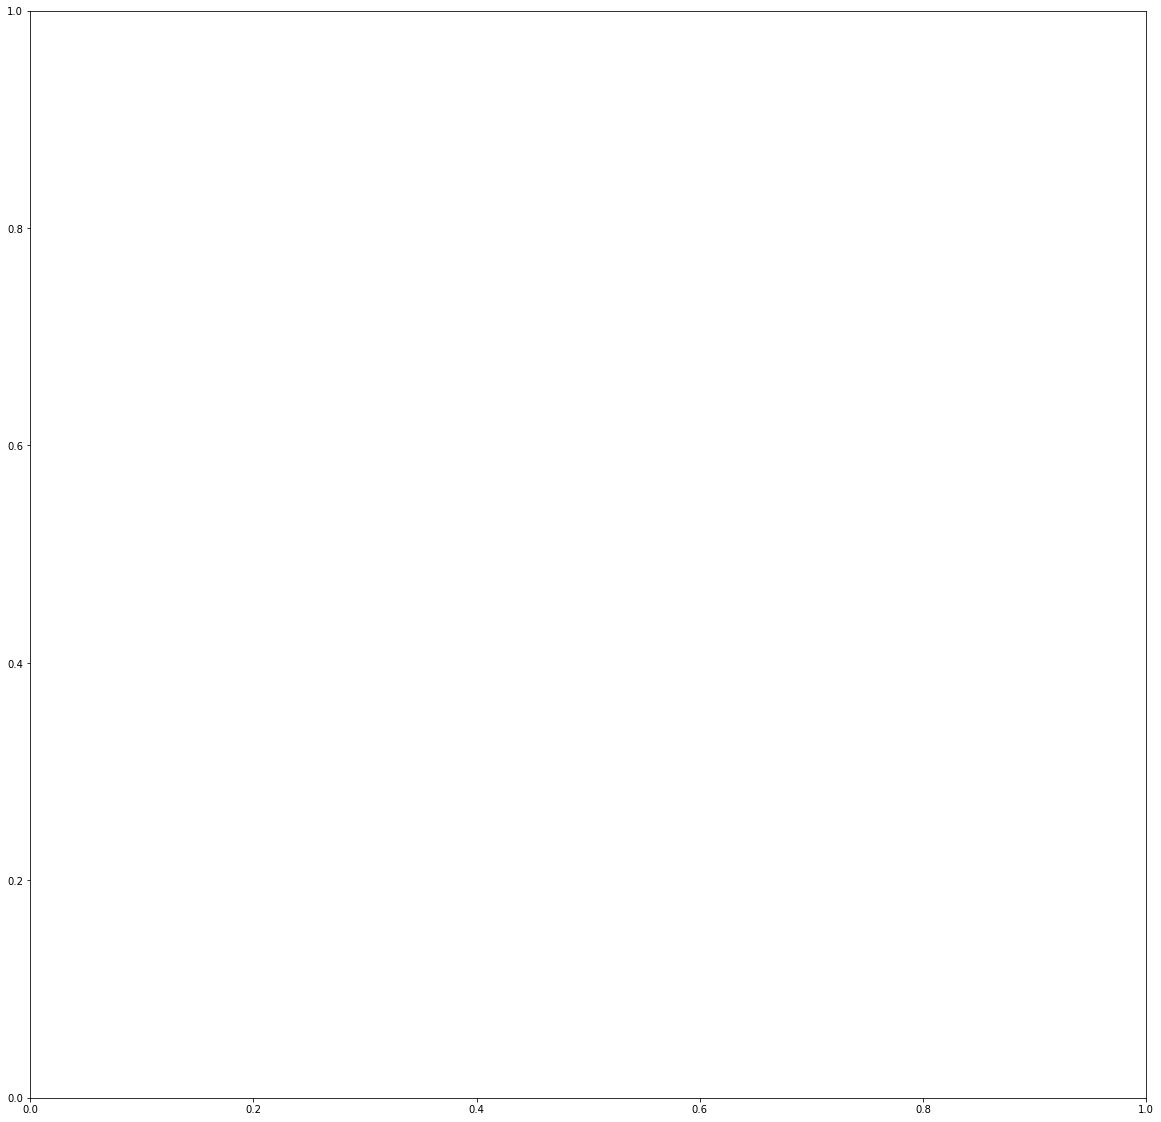

In [18]:
#create subplot
f,ax = plt.subplots(figsize=(20,20))

In [19]:
#create the correlation heatmap using seaborn
corr = sns.heatmap(traffic_corre.corr(), annot = True, ax = ax)

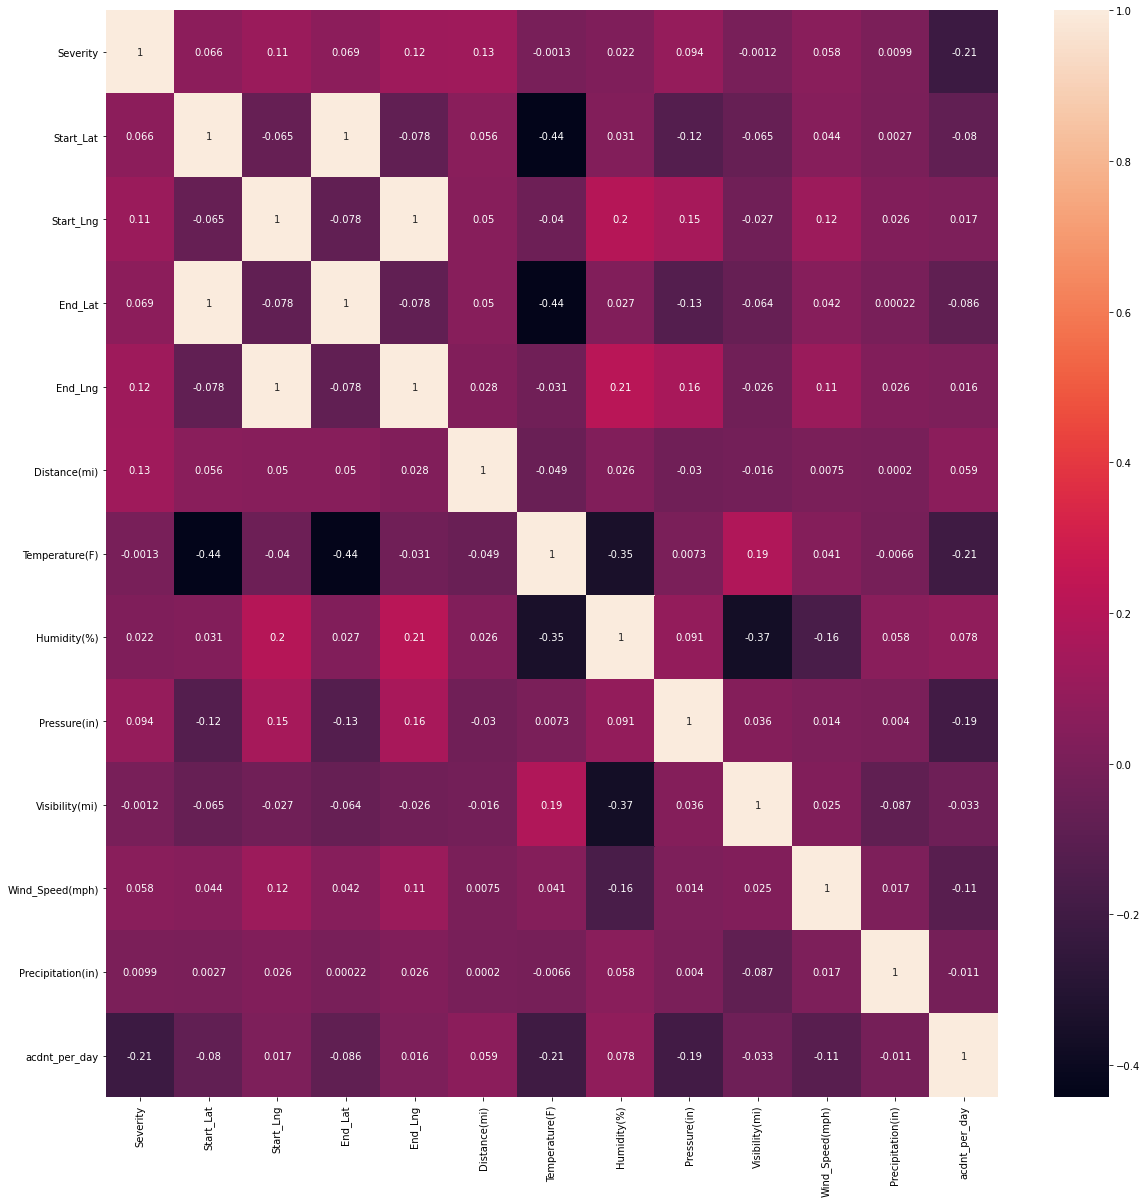

In [20]:
corr.figure

Notable relationships:
The only strong relationships (.5 to 1)are the column pairs of starting and ending latitude and longitude. They show a correlation of 1 but the columns themselves are not equal. This makes sense as the distance from an accident start to end point is unlikely to ever be far enough to drasticly change latitude and longitude values.

Moderate relationships (0.3 to 0.5) include:
Start_Lat or End_Lat and Temperature(F) at -.44. This makes sense as the larger the latitude, the farther you are away from the equator and more likely to have a lower temperature.

Temperature(F) and Humidity(%) at -.34. This is a known weather phenomenon that humidity and temperature are inversely proportional. When temperature increases air can hold more liquid and air will become relatively drier.

Humidity(%) and Visibility(mi) at -.37. This would make sense as less relative moisture in the air would likely result in clearer conditions (less fog/rain) and increase visibility.

### 4
Create scatterplots for strongest correlations

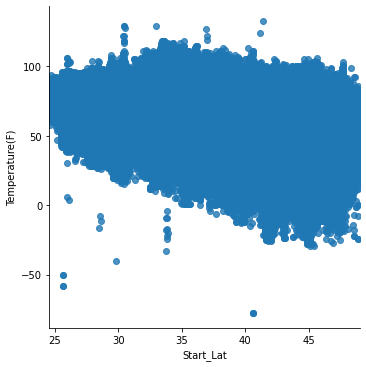

In [21]:
# Create a scatterplot for the Start_Time and Temperature(F) columns in seaborn
sns.lmplot(x = 'Start_Lat', y = 'Temperature(F)', data = traffic)

While there are some outliers to be looked at, the relationship does look to follow a negative linear trend. However, as makes sense with seasonality there is a wide temperature range for each latitude value. 

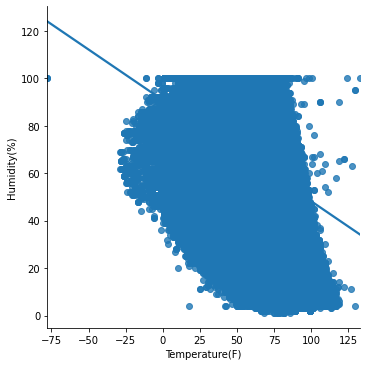

In [22]:
# Create a scatterplot for the Humidity(%) and Temperature(F) columns in seaborn
sns.lmplot(x = 'Temperature(F)', y = 'Humidity(%)', data = traffic)

Definitely one outlier at -75F to be investigated. Range of Temperature values across each humidity value is pretty consistent but makes it difficult to spot a pattern.

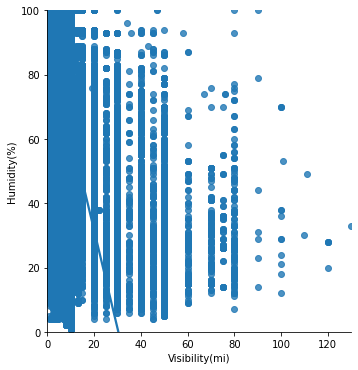

In [23]:
# Create a scatterplot for the Visibility(mi) and Humidity(%) columns in seaborn
vis_hum = sns.lmplot(x = 'Visibility(mi)', y = 'Humidity(%)', data = traffic)
vis_hum.set(ylim=(0,100))

The large majority of visibility values look to be between 0-20 miles and prevalent across all humidity values. It does look like the longer the visibility values the more humidity trends towards around 45%. This could potentially be an 'ideal' value for humidity in terms of visibility.

### 5
Create pair plot

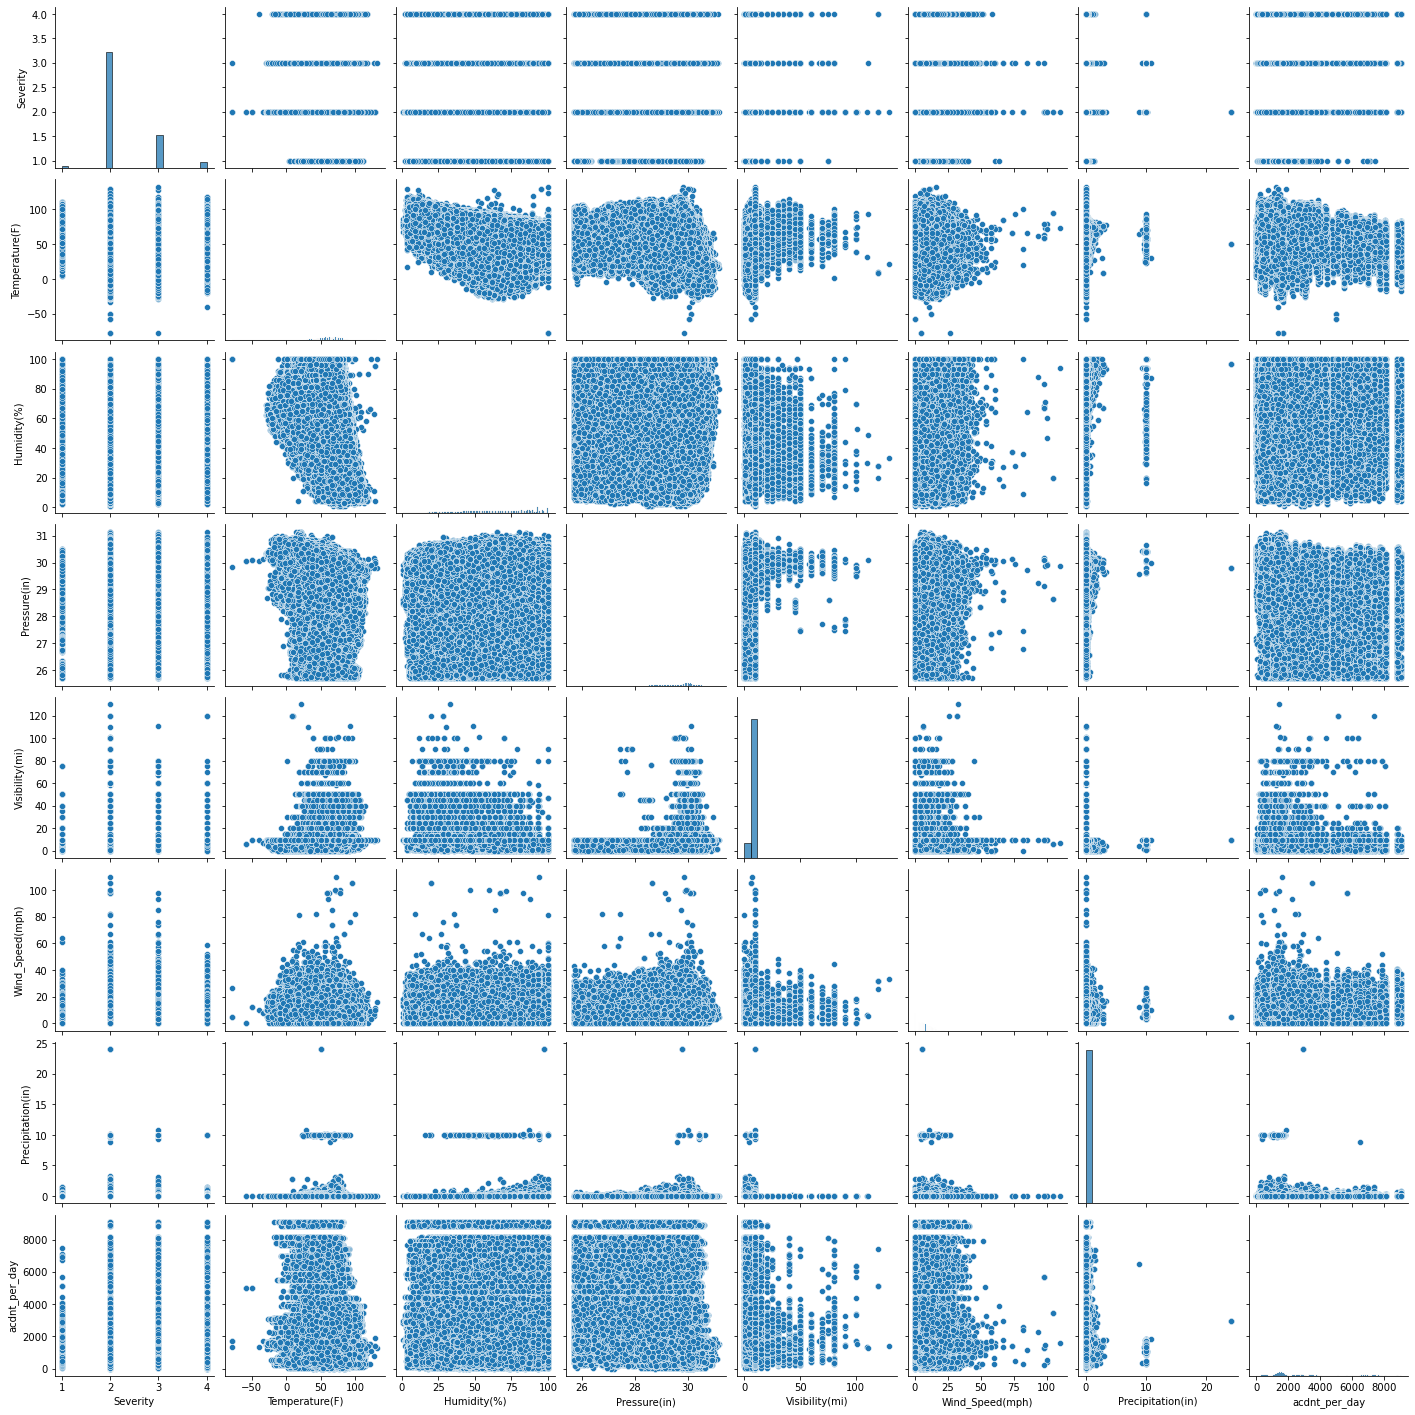

In [24]:
# Create a pair plot of columns of interest in traffic_corre
sub_plot = traffic[['Severity', 'Start_Time', 'Timezone', 'Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)', 'acdnt_per_day']]
pair_plot = sns.pairplot(sub_plot)

Notes from pair plot
Severity: 
Severity 1 accidents appear to occur at a higher Temperature range than 2,3, and 4 and lower visibility distances, wind speed, and precipitation. While not all factors fit this may indicate that the better the 'weather conditions' the more likely for less sever accidents. Or perhaps all the accidents in LA are skewing the data.

Visibility and Wind Speed: Visibility either seems to have a large range for low wind speed and if wind speed increases at all then there is no visbility.

Precipitation:
There looks to be a clustering of precipitation values across all the various weather measurements into low, middle, and extreme. However, per histogram precipitation looks to nearly universally happen in low amounts. 

<AxesSubplot:ylabel='Frequency'>

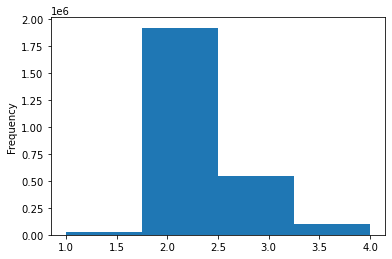

In [25]:
#replotting histograms of variables as pair plot size makes them difficult to see
traffic['Severity'].plot.hist(bins = 4)

In [26]:
traffic['Severity'].value_counts()

2    1922675
3     546365
4     102158
1      28186
Name: Severity, dtype: int64

<AxesSubplot:ylabel='Frequency'>

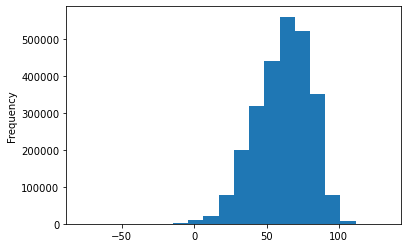

In [27]:
traffic['Temperature(F)'].plot.hist(bins = 20)

In [28]:
#find the count values for temperature by bins of  about 10 degrees
traffic['Temperature(F)'].value_counts(bins = 21)

(62.467, 72.486]                 525909
(72.486, 82.505]                 492877
(52.448, 62.467]                 475522
(42.429, 52.448]                 367017
(82.505, 92.524]                 249545
(32.41, 42.429]                  229929
(22.39, 32.41]                   130921
(92.524, 102.543]                 49525
(12.371, 22.39]                   42337
(2.352, 12.371]                   14684
(-7.667, 2.352]                    5473
(102.543, 112.562]                 4941
(-17.686, -7.667]                   986
(-27.705, -17.686]                  232
(112.562, 122.581]                  134
(-37.724, -27.705]                   12
(122.581, 132.6]                      7
(-78.01100000000001, -67.781]         3
(-67.781, -57.762]                    2
(-57.762, -47.743]                    2
(-47.743, -37.724]                    1
Name: Temperature(F), dtype: int64

<AxesSubplot:ylabel='Frequency'>

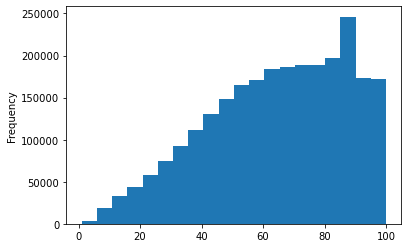

In [29]:
traffic['Humidity(%)'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

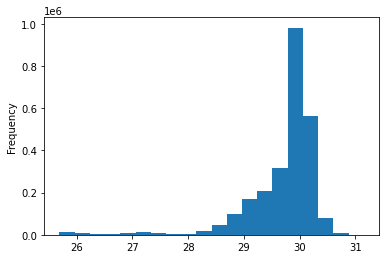

In [30]:
traffic['Pressure(in)'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

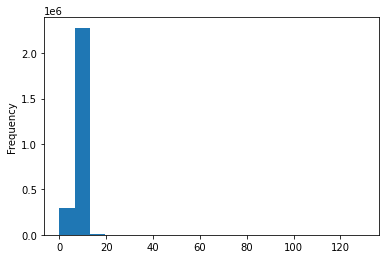

In [31]:
traffic['Visibility(mi)'].plot.hist(bins = 20)

In [32]:
3300/5280

0.625

In [33]:
#find the count values for Visibility by bins of very low (less than 300ft), fog (less than 3300 ft, mist (.62 to 1.2 mi), haze (1.2 to 3.1 mi), and else
traffic['Visibility(mi)'].value_counts(bins = [-1,.06,.625,1.2,3.1,200])

(3.1, 200.0]      2428068
(1.2, 3.1]          96977
(0.625, 1.2]        39942
(0.06, 0.625]       23826
(-1.001, 0.06]       2152
Name: Visibility(mi), dtype: int64

<AxesSubplot:ylabel='Frequency'>

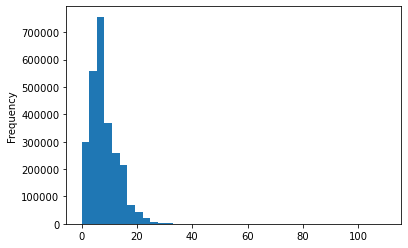

In [34]:
traffic['Wind_Speed(mph)'].plot.hist(bins = 40)

<AxesSubplot:ylabel='Frequency'>

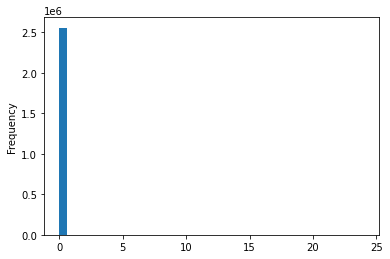

In [35]:
traffic['Precipitation(in)'].plot.hist(bins = 40)

### 6
Create categorical plots

<AxesSubplot:>

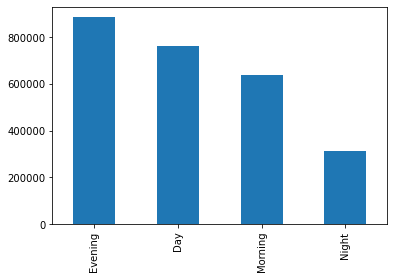

In [36]:
#create bar chart of time_of_day. time_of_day column created from start_time occured in part 2 Data Wrangling
traffic['time_of_day'].value_counts().plot.bar()

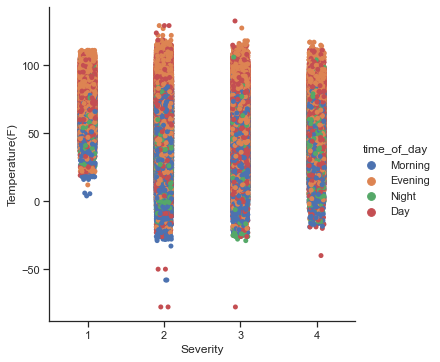

In [37]:
#create categorical plot in seaborn of the Temperature against the severity of accidents with time_of_day as the colors
sns.set(style="ticks")
catplot_sev_time = sns.catplot(x="Severity", y="Temperature(F)", hue="time_of_day", data=traffic)

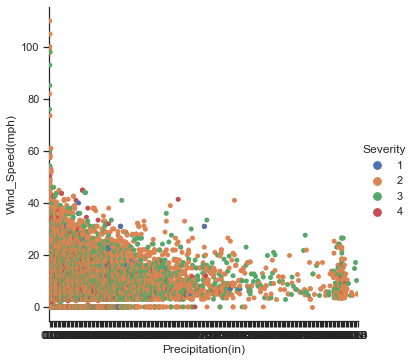

In [38]:
#create categroical plot in seaborn of precipitation against wind speed with severity of accidents the colors
sns.set(style="ticks")
catplot_sev_time = sns.catplot(x="Precipitation(in)", y="Wind_Speed(mph)", hue="Severity", data=traffic)

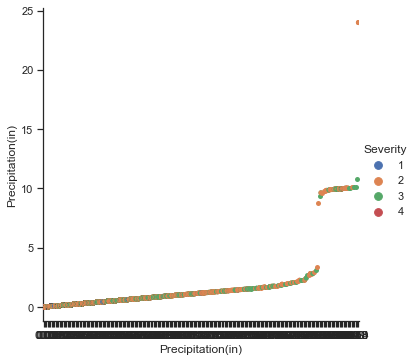

In [39]:
#create categroical plot in seaborn of precipitation against itself with severity of accidents the colors
sns.set(style="ticks")
catplot_sev_time = sns.catplot(x="Precipitation(in)", y="Precipitation(in)", hue="Severity", data=traffic)

### 7
Bar charts

In [40]:
#create data frame of just the POI columns
df_poi = traffic.filter(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis = 1)

In [48]:
#look at counts of tru or false for each POI
df_poi_count = df_poi.apply(pd.Series.value_counts)
print(df_poi_count)

       Amenity     Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
False  2571391  2598850   2400161   2592232   2354325  2595884  2576448   
True     27993      534    199223      7152    245059     3500    22936   

       Roundabout  Station     Stop  Traffic_Calming  Traffic_Signal  \
False     2599253  2547437  2558767          2598222         2188977   
True          131    51947    40617             1162          410407   

       Turning_Loop  
False     2599384.0  
True            NaN  


In [63]:
Amenity_True = df_poi_count.loc[1,'Amenity']
Bump_True = df_poi_count.loc[1,'Bump']
Crossing_True = df_poi_count.loc[1,'Crossing']
Give_Way_True = df_poi_count.loc[1,'Give_Way']
Junction_True = df_poi_count.loc[1,'Junction']
No_Exit_True = df_poi_count.loc[1,'No_Exit']
Railway_True = df_poi_count.loc[1,'Railway']
Roundabout_True = df_poi_count.loc[1,'Roundabout']
Station_True = df_poi_count.loc[1,'Station']
Stop_True = df_poi_count.loc[1,'Stop']
Traffic_Calming_True = df_poi_count.loc[1,'Traffic_Calming']
Traffic_Signal = df_poi_count.loc[1,'Traffic_Signal']

total_rows = traffic['ID'].count()

print('% of accidents at Amenity_True = %', (Amenity_True/total_rows)*100)
print('% of accidents at Bump_True = %', (Bump_True/total_rows)*100)
print('% of accidents at Crossing_True = %', (Crossing_True/total_rows)*100)
print('% of accidents at Give_Way_True = %', (Give_Way_True/total_rows)*100)
print('% of accidents at Junction_True = %', (Junction_True/total_rows)*100)
print('% of accidents at No_Exit_True = %', (No_Exit_True/total_rows)*100)
print('% of accidents at Railway_True = %', (Railway_True/total_rows)*100)
print('% of accidents at Roundabout_True = %', (Roundabout_True/total_rows)*100)
print('% of accidents at Station_True = %', (Station_True/total_rows)*100)
print('% of accidents at Stop_True = %', (Stop_True/total_rows)*100)
print('% of accidents at Traffic_Calming_True = %', (Traffic_Calming_True/total_rows)*100)
print('% of accidents at Traffic_Signal = %', (Traffic_Signal/total_rows)*100)


% of accidents at Amenity_True = % 1.0769089907454998
% of accidents at Bump_True = % 0.02054332872711381
% of accidents at Crossing_True = % 7.664238911988379
% of accidents at Give_Way_True = % 0.2751421105923557
% of accidents at Junction_True = % 9.427579765052027
% of accidents at No_Exit_True = % 0.1346472856646036
% of accidents at Railway_True = % 0.882362898286671
% of accidents at Roundabout_True = % 0.005039655549160878
% of accidents at Station_True = % 1.998435013834047
% of accidents at Stop_True = % 1.5625625148112012
% of accidents at Traffic_Calming_True = % 0.0447028988406484
% of accidents at Traffic_Signal = % 15.78862530507228


In [43]:
#create df_poi_counts to hold the counts for each column in df_poi
df_poi_counts = df_poi.apply(pd.Series.value_counts)

In [44]:
#filter df_poi_counts to only keep the row of counts for where poi appears 
df_poi_true = df_poi_counts.iloc[1:,:]

In [45]:
#chart the counts of df_poi_true in bar chart
df_poi_true.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
True,27993,534,199223,7152,245059,3500,22936,131,51947,40617,1162,410407,NaN


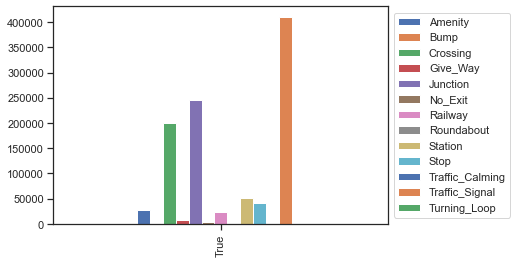

In [46]:
df_poi_true.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

The most common POI present when accidents occur in order are Traffic Signals, then Junctions, then Crossings.

### 8
Revisiting data questions

Original Question:
What collection of POI or geographic variables have the highest rate of accidents?

Finding:
The most common POI present when accidents occur in order are Traffic Signals, then Junctions, then Crossings.

Original Question: 
What is the frequency of accidents? Is there a relationship between time of day and accidents?

Finding:
Accidents are most common in the Evening, then Day, then Morning. Accidents at Night are much less common.

Original Question:
Are accidents more common in inclement weather?

Findings: The most common temperature for accidents is around 70 F. Other weather values like Precipitation and Wind Speed are very low for accidents. 
For visibility there is a a fair number of accidents that occur in visibly defined fog or mist conditions. But clear is by far the most common.
Based on overall rows the weather looks to be very good for the majority of accidents.

Original Question:
What is the most common severity of accidents?

Findings:
Severity 2 is by far the most common severity. Order and counts shown below.
2    2129263
3     629452
4     119144
1      28751

Additional Questions:
Is there any difference in accidents per month or year? Overall or split into the time of day categories. 

Are accidents going up or down by state by year?

What are the average weather values for accidents when grouped by State? Or perhaps what are the most common weather values for accidents per state?

Is it possible to combine weather values into a single column that defines driving danger? This could be added to the above question of grouping by state.

When POI are near, accidents most commonly occur where traffic crosses (Signal, Junction, Crosses). Do accidents more commonly occur on or off highways/freeways?

### 9 
Developing hypothesis ideas

Accidents will occur regardless of weather. The most commonly experienced weather conditions for a state will result in the most number of accidents.

The worst weather conditions will result in a higher proportion of severe accidents than good weather conditions.

If you are in state x, then you will be most likely be in an accident when weather conditions are y, the time of day is q, and your location is near z(likely either POI or highway vs roadway). Could also do least likely.

### 10
Export Data

In [47]:
#export data
traffic.to_csv(os.path.join(path, 'Prepared' , 'v2_data_post_wrangling_and_vis_explore.csv'))